In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import math

storing different portfolios data

In [2]:
#portfolio1=(tickers=['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA'], weights=[0.3, 0.2, 0.2, 0.2, 0.1],start_date='2023-01-01',end_date='2023-12-31')
#portfolio2=(tickers=['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA'], weights=[0.1, 0.3, 0.3, 0.1, 0.2],start_date='2023-01-01',end_date='2023-12-31')


In [3]:

def stock_data(ticker,start,end):
    data=yf.download(tickers=ticker,start=start,end=end)
    return data["Close"]
# the shares1 parameter in the below function refers to the no of stocks of the first stock 
# closing1 is the previously extracted closing prices data from the financial data

def portfolio_value_list(shares1,shares2,shares3,shares4,shares5,closing1,closing2,closing3,closing4,closing5):
    portfolio_value_list=[]
    closing_list1=closing1.squeeze().tolist()
    closing_list2=closing2.squeeze().tolist()
    closing_list3=closing3.squeeze().tolist()
    closing_list4=closing4.squeeze().tolist()
    closing_list5=closing5.squeeze().tolist()
    
    for (a,b,c,d,e) in zip(closing_list1,closing_list2,closing_list3,closing_list4,closing_list5):
        portfolio_value=a*shares1+b*shares2+c*shares3+d*shares4+e*shares5
        portfolio_value_list.append(portfolio_value)

    return portfolio_value_list

In [4]:
def analyze_portfolio(tickers,weights,start_date,end_date):
    closing1=stock_data(tickers[0],start=start_date,end=end_date)
    closing2=stock_data(tickers[1],start=start_date,end=end_date)
    closing3=stock_data(tickers[2],start=start_date,end=end_date)
    closing4=stock_data(tickers[3],start=start_date,end=end_date)
    closing5=stock_data(tickers[4],start=start_date,end=end_date)

   

    # 100k are invested into each portfolio, however the complete amount is not invested as shares cannot be bought in fraction hence we use .floor() 
    investment=100000
    no_of_stock1=math.floor(investment*weights[0]/closing1.iloc[0])
    no_of_stock2=math.floor(investment*weights[1]/closing2.iloc[0])
    no_of_stock3=math.floor(investment*weights[2]/closing3.iloc[0])
    no_of_stock4=math.floor(investment*weights[3]/closing4.iloc[0])
    no_of_stock5=math.floor(investment*weights[4]/closing5.iloc[0])

    portfolio_list=portfolio_value_list(no_of_stock1,no_of_stock2,no_of_stock3,no_of_stock4,no_of_stock5,closing1,closing2,closing3,closing4,closing5)

    date_list=closing1.index
    return portfolio_list
    

In [5]:
portfolio_list1=analyze_portfolio(tickers=['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA'], weights=[0.3, 0.2, 0.2, 0.2, 0.1],start_date='2023-01-01',end_date='2023-12-31')
portfolio_list2=analyze_portfolio(tickers=['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA'], weights=[0.1, 0.3, 0.3, 0.1, 0.2],start_date='2023-01-01',end_date='2023-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_796\2068007436.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  no_of_stock1=math.floor(investment*weights[0]/closing1.iloc[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_796\2068007436.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  no_of_stock2=math.floor(investment*weights[1]/closing2.iloc[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_796\2068007436.py:14: FutureWarning: Calling float on a single element

Plotting the graph

[*********************100%***********************]  1 of 1 completed


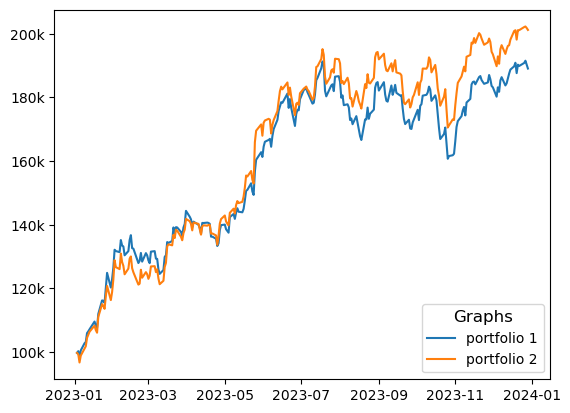

portfolio 2 performed better than portfolio 1 by a decent margin towards the end.
however the two were almost similar during the first seven months.
This can be due to the better performing MSFT stock having higher weight in the second portfolio while the low performing AAPL stock having lower weight


In [7]:
#to get the date index:
data=yf.download(tickers="AAPL",start='2023-01-01',end='2023-12-31')
date_list=data.index
#plotting the graph 
plt.plot(date_list,portfolio_list1,label="portfolio 1")
plt.plot(date_list,portfolio_list2,label="portfolio 2")
plt.yticks([100_000, 120000, 140000, 160000,180000,200000], 
           ['100k', '120k', '140k', '160k', '180k', '200k'])
plt.legend(loc='lower right', fontsize=10, title="Graphs", title_fontsize=12)
plt.show()

#brief description of the graph.
print("portfolio 2 performed better than portfolio 1 by a decent margin towards the end.")
print("however the two were almost similar during the first seven months.")
print("This can be due to the better performing MSFT stock having higher weight in the second portfolio while the low performing AAPL stock having lower weight")